<a href="https://colab.research.google.com/github/isabelamchaves/Introdu-o-Ci-ncia-de-Dados/blob/main/08_SVM_com_e_sem_padronizacao_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# kNN com e sem Padronização de Dados




## 1. Introdução

Neste notebook, vamos explorar a implementação do algoritmo KNN e na avaliação de seu desempenho em problemas de classificação binária, utilizando dados sintéticos e métricas como matriz de confusão e curva ROC.

## 2. Importando as Bibliotecas

In [36]:
# Importando as bibliotecas necessárias
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

## 3. Criação do conjunto de dados sintético

In [37]:
# Gerar o conjunto de dados
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Salvar os dados antes da padronização
df_original = pd.DataFrame(X, columns=['Feature1', 'Feature2'])
df_original['Target'] = y
df_original.to_csv('dados_originais.csv', index=False)

## 4. Padronizando os Dados
Em seguida, padronizamos os dados usando StandardScaler.

In [38]:
# Padronizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Salvar os dados após a padronização
df_scaled = pd.DataFrame(X_scaled, columns=['Feature1', 'Feature2'])
df_scaled['Target'] = y
df_scaled.to_csv('dados_padronizados.csv', index=False)

## 5. Dividindo o conjunto de dados em treino e teste

In [39]:
# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_scaled, X_test_scaled, _, _ = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

## 6.  Treinamento do Modelo SVM









In [40]:
kernels = ['linear', 'rbf', 'poly']
results = {}

for kernel in kernels:
    # Sem padronização
    clf = SVC(kernel=kernel, probability=True, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_pred_proba = clf.decision_function(X_test)

    # Com padronização
    clf_scaled = SVC(kernel=kernel, probability=True, random_state=42)
    clf_scaled.fit(X_train_scaled, y_train)
    y_pred_scaled = clf_scaled.predict(X_test_scaled)
    y_pred_proba_scaled = clf_scaled.decision_function(X_test_scaled)

    # Armazenando os resultados
    results[kernel] = {
        'clf': clf,
        'clf_scaled': clf_scaled,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba,
        'y_pred_scaled': y_pred_scaled,
        'y_pred_proba_scaled': y_pred_proba_scaled
    }

## 7. Avaliação dos Resultados

Aplicamos as métricas de avaliação, como matriz de confusão, curva ROC e visualização da fronteira de decisão.

### 7.1 Matrizes de Confusão

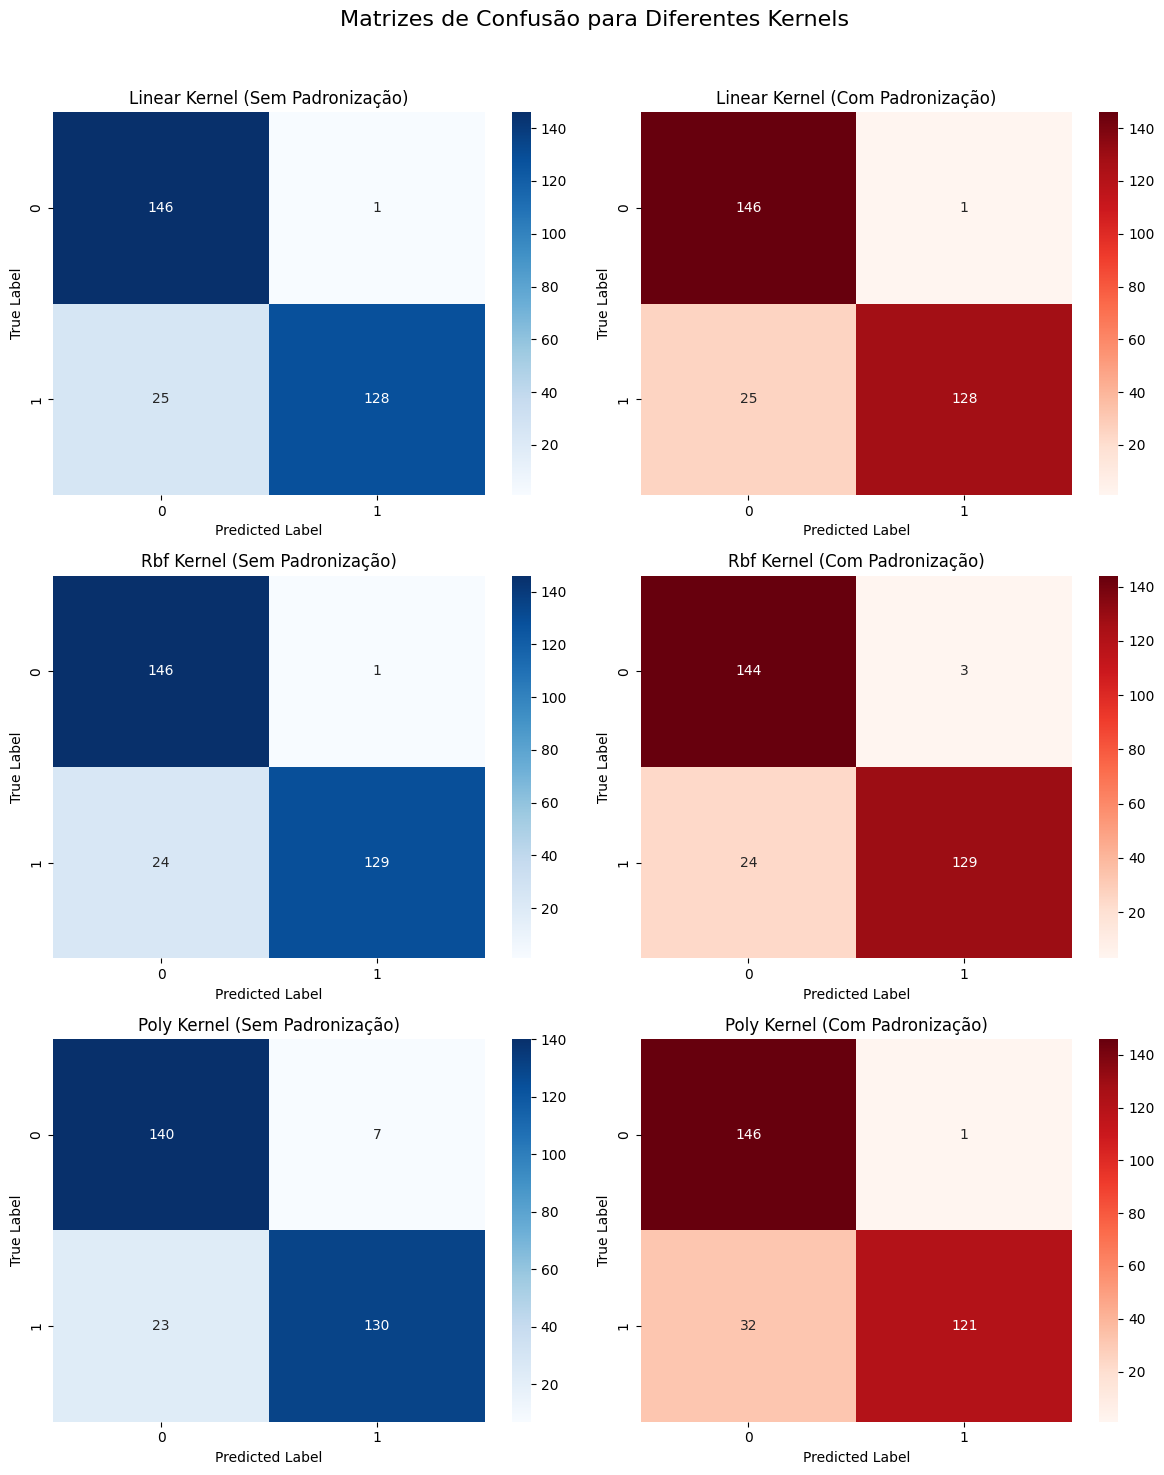

In [41]:
# Matrizes de Confusão

# Criando subplots para as matrizes de confusão
fig, axes = plt.subplots(3, 2, figsize=(12, 15))
fig.suptitle("Matrizes de Confusão para Diferentes Kernels", fontsize=16)

for i, kernel in enumerate(kernels):
    # Matrizes de Confusão
    cm = confusion_matrix(y_test, results[kernel]['y_pred'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i, 0])
    axes[i, 0].set_title(f"{kernel.capitalize()} Kernel (Sem Padronização)")
    axes[i, 0].set_xlabel('Predicted Label')
    axes[i, 0].set_ylabel('True Label')

    cm_scaled = confusion_matrix(y_test, results[kernel]['y_pred_scaled'])
    sns.heatmap(cm_scaled, annot=True, fmt='d', cmap='Reds', ax=axes[i, 1])
    axes[i, 1].set_title(f"{kernel.capitalize()} Kernel (Com Padronização)")
    axes[i, 1].set_xlabel('Predicted Label')
    axes[i, 1].set_ylabel('True Label')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### 7.2 Curva ROC


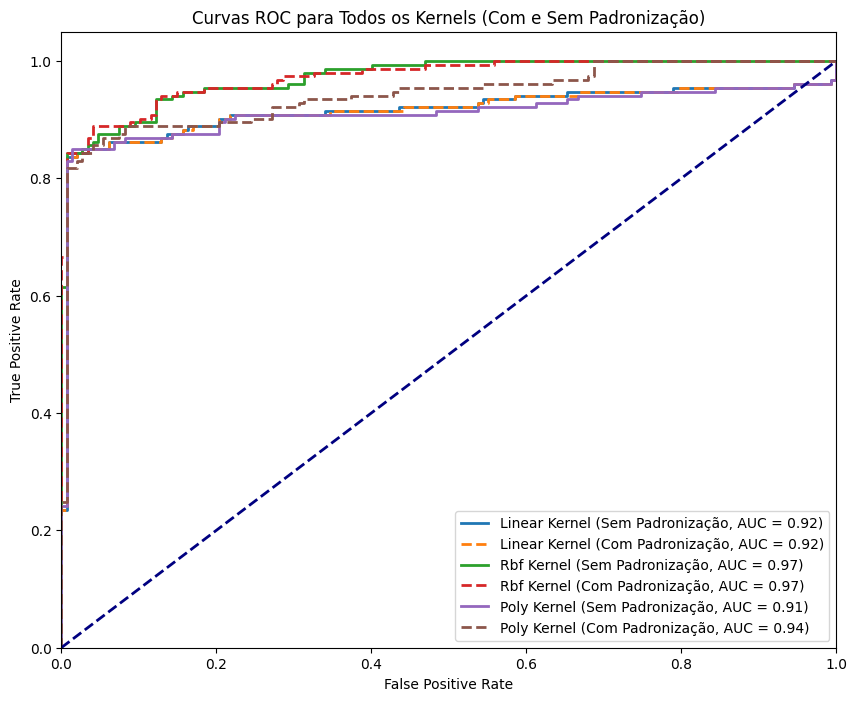

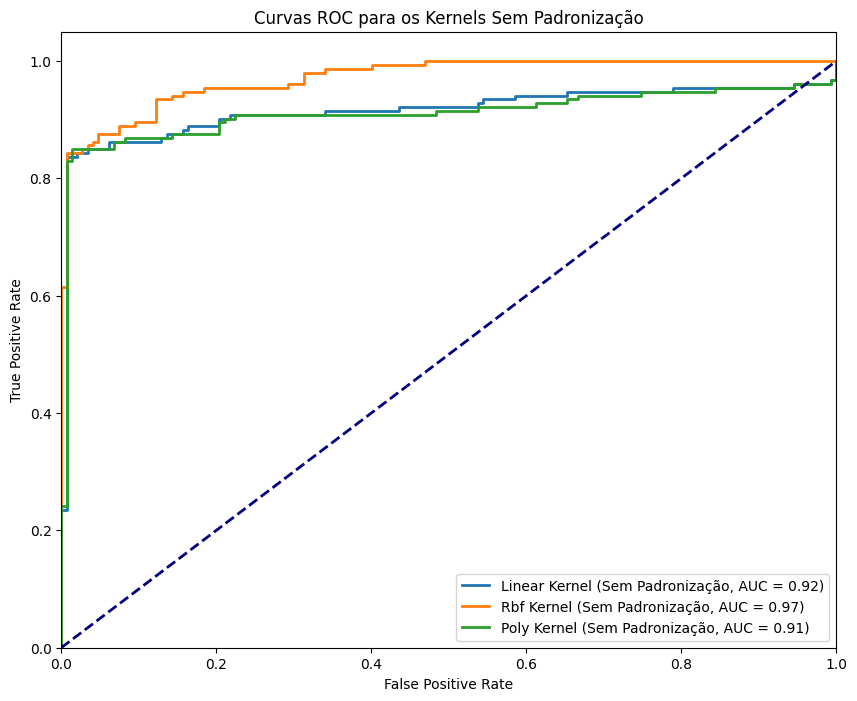

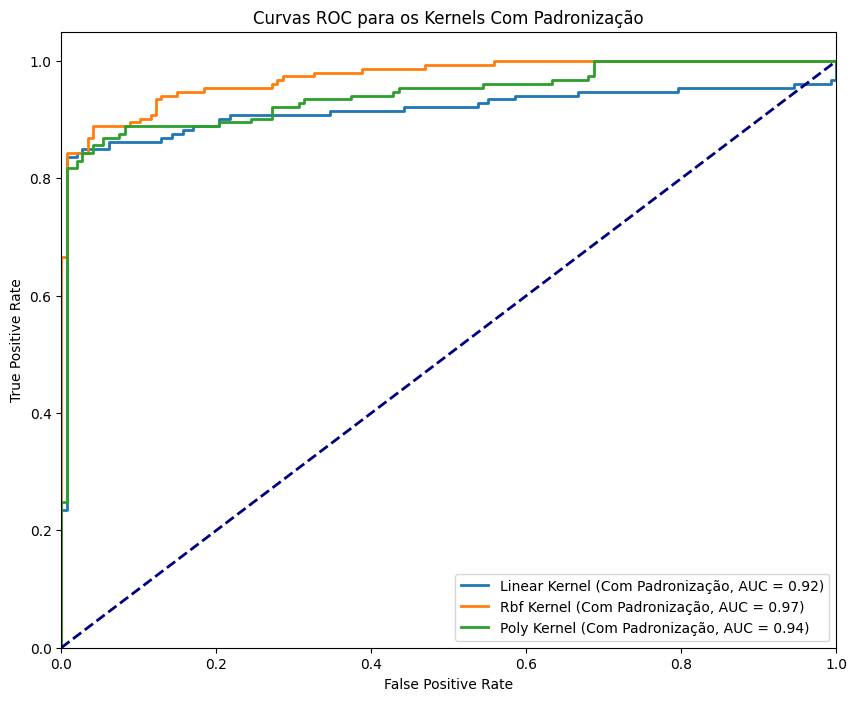

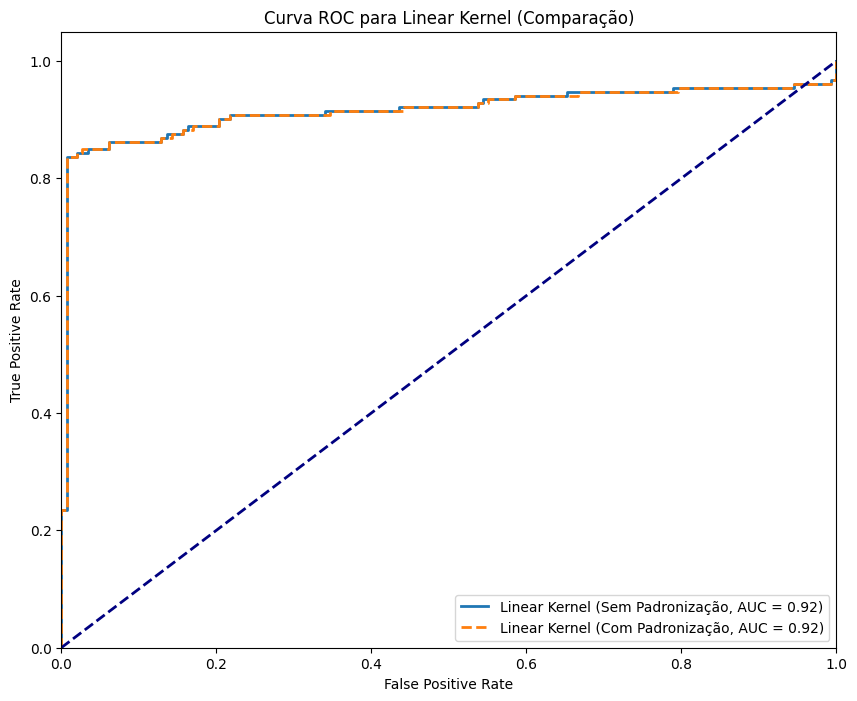

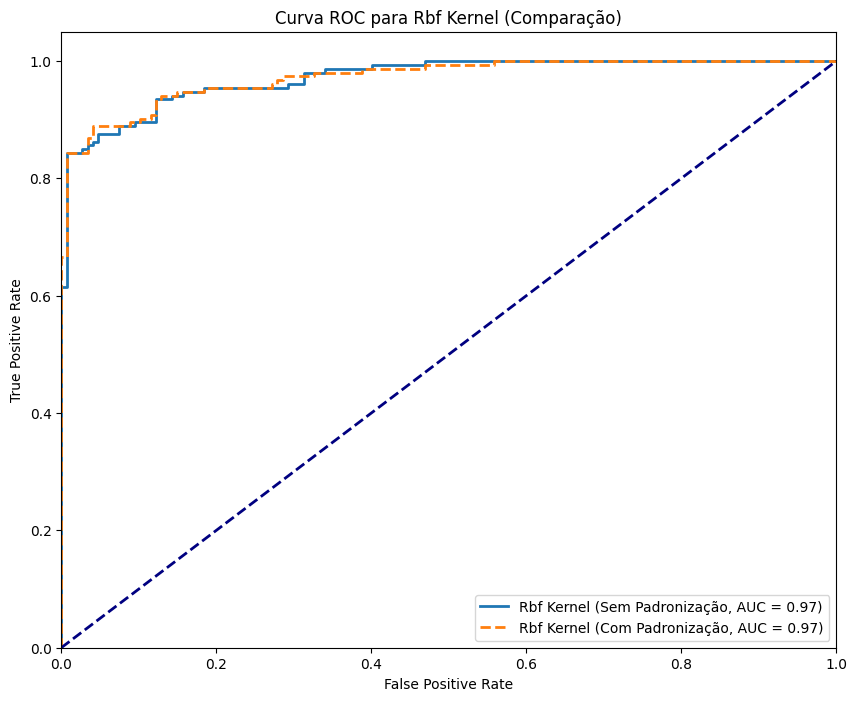

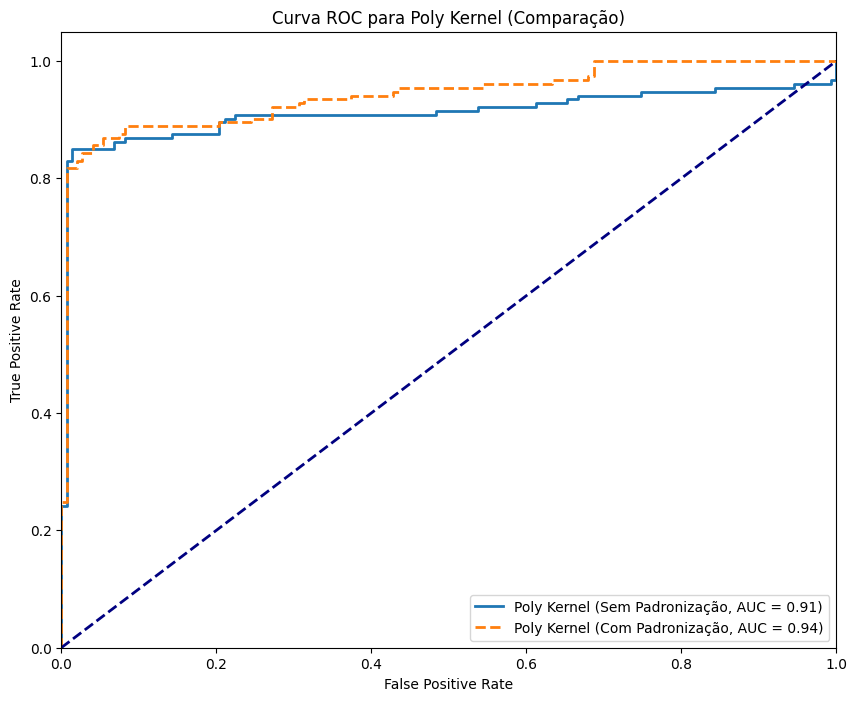

In [42]:
# Curva ROC com todos os kernels (com e sem padronização)
plt.figure(figsize=(10, 8))
for kernel in kernels:
    fpr1, tpr1, _ = roc_curve(y_test, results[kernel]['y_pred_proba'])
    roc_auc1 = auc(fpr1, tpr1)

    fpr2, tpr2, _ = roc_curve(y_test, results[kernel]['y_pred_proba_scaled'])
    roc_auc2 = auc(fpr2, tpr2)

    plt.plot(fpr1, tpr1, lw=2, label=f'{kernel.capitalize()} Kernel (Sem Padronização, AUC = {roc_auc1:.2f})')
    plt.plot(fpr2, tpr2, lw=2, linestyle='--', label=f'{kernel.capitalize()} Kernel (Com Padronização, AUC = {roc_auc2:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curvas ROC para Todos os Kernels (Com e Sem Padronização)')
plt.legend(loc="lower right")
plt.show()

# Curva ROC apenas com os kernels sem padronização
plt.figure(figsize=(10, 8))
for kernel in kernels:
    fpr1, tpr1, _ = roc_curve(y_test, results[kernel]['y_pred_proba'])
    roc_auc1 = auc(fpr1, tpr1)

    plt.plot(fpr1, tpr1, lw=2, label=f'{kernel.capitalize()} Kernel (Sem Padronização, AUC = {roc_auc1:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curvas ROC para os Kernels Sem Padronização')
plt.legend(loc="lower right")
plt.show()

# Curva ROC apenas com os kernels com padronização
plt.figure(figsize=(10, 8))
for kernel in kernels:
    fpr2, tpr2, _ = roc_curve(y_test, results[kernel]['y_pred_proba_scaled'])
    roc_auc2 = auc(fpr2, tpr2)

    plt.plot(fpr2, tpr2, lw=2, label=f'{kernel.capitalize()} Kernel (Com Padronização, AUC = {roc_auc2:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curvas ROC para os Kernels Com Padronização')
plt.legend(loc="lower right")
plt.show()

# Curvas ROC separadas por kernel (comparando com e sem padronização)
for kernel in kernels:
    plt.figure(figsize=(10, 8))

    fpr1, tpr1, _ = roc_curve(y_test, results[kernel]['y_pred_proba'])
    roc_auc1 = auc(fpr1, tpr1)

    fpr2, tpr2, _ = roc_curve(y_test, results[kernel]['y_pred_proba_scaled'])
    roc_auc2 = auc(fpr2, tpr2)

    plt.plot(fpr1, tpr1, lw=2, label=f'{kernel.capitalize()} Kernel (Sem Padronização, AUC = {roc_auc1:.2f})')
    plt.plot(fpr2, tpr2, lw=2, linestyle='--', label=f'{kernel.capitalize()} Kernel (Com Padronização, AUC = {roc_auc2:.2f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Curva ROC para {kernel.capitalize()} Kernel (Comparação)')
    plt.legend(loc="lower right")
    plt.show()

### 7.3 Fronteira de Decisão

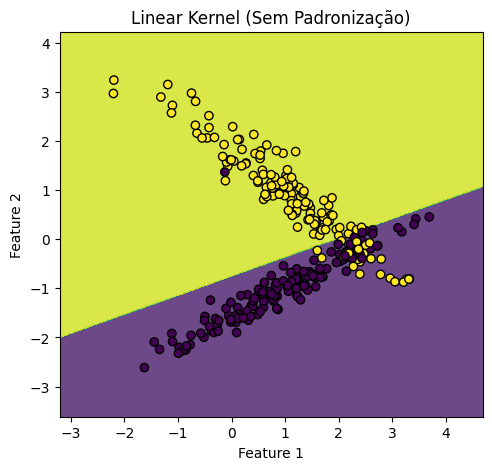

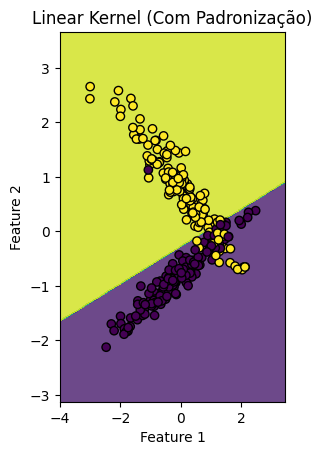

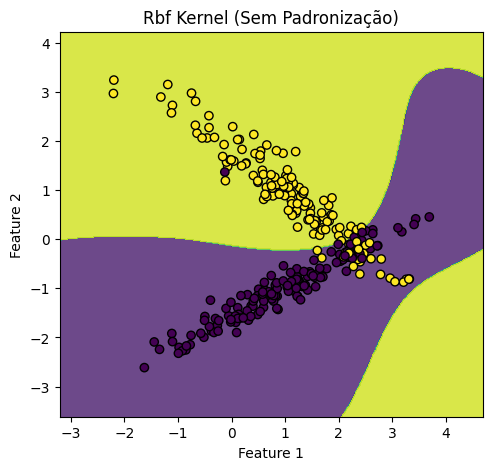

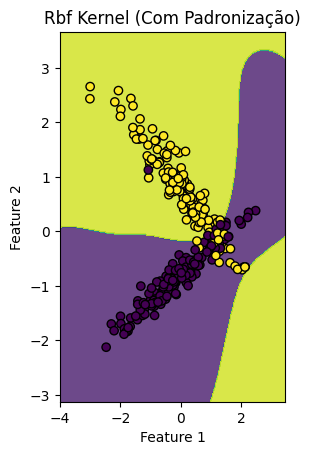

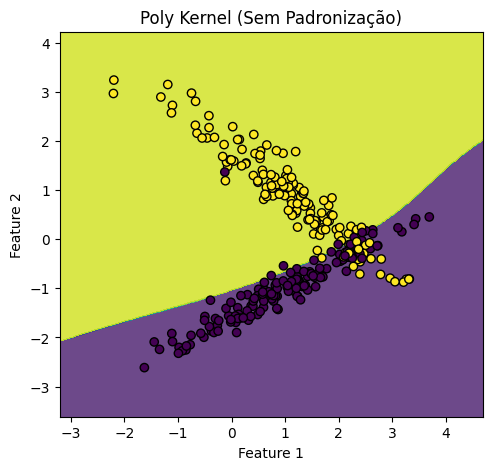

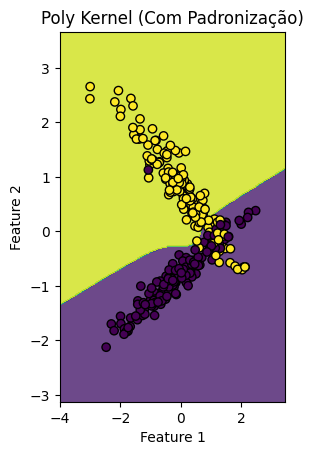

In [43]:
# Função para plotar a fronteira de decisão
def plot_decision_boundary(clf, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Fronteira de Decisão para cada kernel (com e sem padronização)
for kernel in kernels:
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plot_decision_boundary(results[kernel]['clf'], X_test, y_test, title=f'{kernel.capitalize()} Kernel (Sem Padronização)')

    plt.subplot(1, 2, 2)
    plot_decision_boundary(results[kernel]['clf_scaled'], X_test_scaled, y_test, title=f'{kernel.capitalize()} Kernel (Com Padronização)')

## 8. Analisando os Resultados
A padronização de dados é fundamental para o bom desempenho de modelos SVM, especialmente quando se utilizam kernels como RBF e polinomial. Ao eliminar a influência da escala das variáveis, a padronização facilita a convergência do modelo, melhora a generalização e reduz a sensibilidade a outliers. Essa etapa de pré-processamento é crucial para garantir resultados mais precisos e robustos.


## 9. Conclusão
A padronização é uma etapa de pré-processamento crucial para otimizar o desempenho de modelos SVM. Ela garante que todas as features contribuam de forma equitativa para o treinamento do modelo, evitando que features com maior variância dominem o processo.